In [1]:
!pip install category_encoders

In [0]:
import pandas as pd
import seaborn as sns
import category_encoders as ce
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [0]:
path = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'
df = pd.read_csv(path)
assert df.shape == (48300, 34)

In [0]:
# change to datetime
df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)

In [0]:
df['month'] = df['created'].dt.month

In [0]:
new_df= df[['elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
           'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
           'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
           'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
           'swimming_pool', 'new_construction', 'exclusive', 'terrace', 'loft',
           'garden_patio', 'common_outdoor_space', 'wheelchair_access']]

In [0]:
df['total_perks'] = new_df.T.sum()

In [0]:
train = df.query('month < 6')
test = df.query('month == 6')

In [10]:
features = ['bedrooms', 'total_perks']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

#encoder = ce.OneHotEncoder(use_cat_names=True)
#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Test RMSE:', sqrt(mean_squared_error(y_test, y_pred)))
print('Test MAE:', mean_absolute_error(y_test, y_pred))
print('Test R^2;', r2_score(y_test, y_pred), '\n')
print('Coefficients:', model.coef_, '\n')
print('Intercept:', model.intercept_)

Test RMSE: 1122.2189885181808
Test MAE: 812.524764615758
Test R^2; 0.3637818098551959 

Coefficients: [693.18036536 102.91822493] 

Intercept: 1914.3132358935943


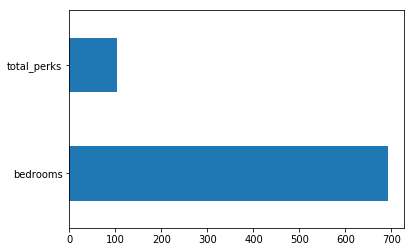

In [11]:
pd.Series(model.coef_, X_train.columns).plot.barh()

In [0]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [13]:
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def viz3D(fitted_model, X, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression model fit on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    X : pandas dataframe, which was used to fit model
    features : list of strings, column names of the 2 features
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://plot.ly/python/3d-charts/
    """
    feature1, feature2 = features
    min1, max1 = X[feature1].min(), X[feature1].max()
    min2, max2 = X[feature2].min(), X[feature2].max()
    x1 = np.linspace(min1, max1, num)
    x2 = np.linspace(min2, max2, num)
    combos = list(itertools.product(x1, x2))
    Z = fitted_model.predict(combos).reshape(num, num)
    
    configure_plotly_browser_state()
    data = [go.Surface(x=x1, y=x2, z=Z)]
    layout = go.Layout(
        scene={'xaxis': {'title': feature1, 'range': [min1,max1], 'showticklabels': True}, 
               'yaxis': {'title': feature2, 'range': [min2,max2], 'showticklabels': True}, 
               'zaxis': {'title': target, 'showticklabels': True}}, 
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [14]:
ny_model = model.fit(X_train, y_train)
viz3D(ny_model, X_train ,features, target, num=100)